# Objectives

- [x] get data from database
- [ ] data wrangling
- [ ] ml model 
- [ ] compare with traditional prediction

# source

 data provided by Openweathermap

# Imports

In [121]:
# os
import os

#googlesheets
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g

# data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random 

# visualization and reporting
import pandas_profiling # dataframe profiling @
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import calmap


# Data imports

## google sheet authentication

In [95]:
#authentication to google api using JSON credential file
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('api_data/WDcred.json', scope)
client = gspread.authorize(creds)

## Historical weather 

In [96]:
#get historical weather berlin sheet
hist_weather = client.open('current_weather_berlin').sheet1

data = hist_weather.get_all_values()
headers = data.pop(0)

df_historical = pd.DataFrame(data, columns=headers)

## get Openweathermap forecast 

In [97]:
#get forecast weather berlin sheet from open weather map
#forecast_weather = client.open('forecast_weather_berlin')
forecast_weather = client.open('forecast_weather_berlin').sheet1

data = forecast_weather.get_all_values()
headers = data.pop(0)

df_forecast = pd.DataFrame(data, columns=headers)

In [98]:
df_hist=df_historical
df_fore=df_forecast

# Wrangle

## get ride of sunrise and sunset

In [130]:
df_hist.drop('sunrisetime',axis =1, inplace=True)
df_hist.drop('sunsettime',axis =1, inplace=True)

## df_forecast column rename 

In [99]:
df_fore.rename(columns={
    '':'datetime',
    "temp_f": "temperature",
    "humidity_f": "humidity",
    "pressure_f": "pressure",
    "wind_speed_f": "windspeed",
    "wind_dir_f": "winddir",
    "cloudcoverage_f": "cloudcoverage",
    "weather_f": "weather",
    "description_f": "description",
    "icon_f": "weathericon"},inplace=True)
#df_fore.columns

## join df

In [100]:
combo=[df_hist,df_fore]

## drop icon

In [101]:
for df in combo:
    df.drop('weathericon',axis =1, inplace=True)

## string to numeric values

In [102]:
for df in combo:
    cols=['temperature', 'humidity', 'pressure', 'windspeed','winddir','cloudcoverage']
    for col in cols:
        df[col]= pd.to_numeric(df[col], errors='coerce')

## String to datetime

In [106]:
for df in combo:
    df['datetime']= pd.to_datetime(df['datetime'], errors='coerce') 

## Heat map

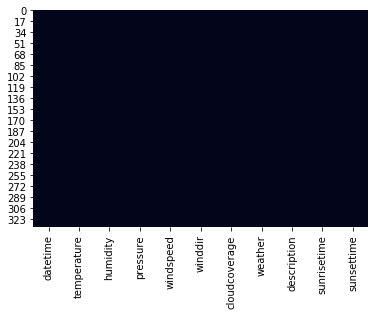

In [119]:
sns.heatmap(df_hist.isnull(), cbar=False)

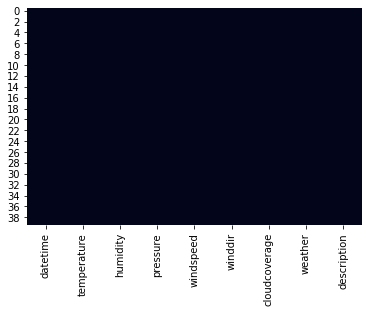

In [115]:
sns.heatmap(df_fore.isnull(), cbar=False)

## Deal with Na

In [118]:
for df in combo:
    df['winddir'].fillna(399,inplace=True)

## Data report

In [132]:
# long
#profile report inline
if False: # Train Data report generation
    profile_hist = df_hist.profile_report(title='Berlin Historical Weather Data') 
    profile_hist.to_file(output_file="profile_report/Berlin Historical Weather Data.html") # save the report 
    profile_hist # display inline
if False: # Test Data report generation
    profile_fore = df_fore.profile_report(title='Berlin Forecast Weather Data')
    profile_fore.to_file(output_file="profile_report/Berlin Forecast Weather Data.html") # save the report 
    profile_fore # in order to display inline

In [133]:
# short
if False: # hist report
    #df_hist.head()
    df_hist.info()
    #df_hist.describe(include='all')
    
if False: # fore report
    df_fore.head()
    df_fore.info()
    #df_fore.describe()
    #df_fore.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
datetime         336 non-null datetime64[ns]
temperature      336 non-null float64
humidity         336 non-null int64
pressure         336 non-null int64
windspeed        336 non-null float64
winddir          336 non-null float64
cloudcoverage    336 non-null int64
weather          336 non-null object
description      336 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 23.8+ KB
